In [1]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import pandas as pd
import numpy as np
import wrangle
from env import host, user, password
import seaborn as sns
import matplotlib.pyplot as plt
import explore


1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [2]:
df = wrangle.get_data_from_sql()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [3]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

train.shape, validate.shape, test.shape

((1084, 4), (272, 4), (339, 4))

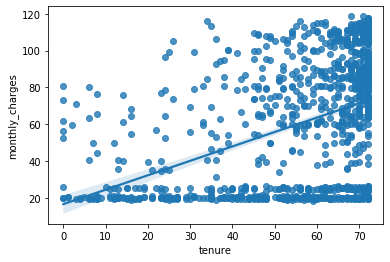

In [4]:
#sns.jointplot(x='tenure', y='monthly_charges', data=train)
sns.regplot(x='tenure', y='monthly_charges', data=train)

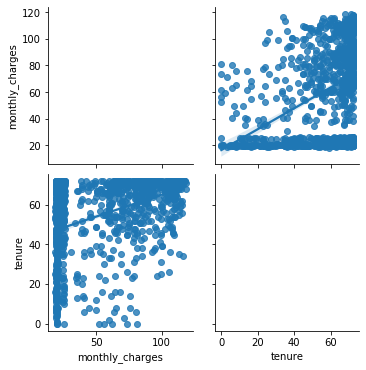

In [5]:
g = sns.PairGrid(train)
g
g.map_offdiag(sns.regplot)

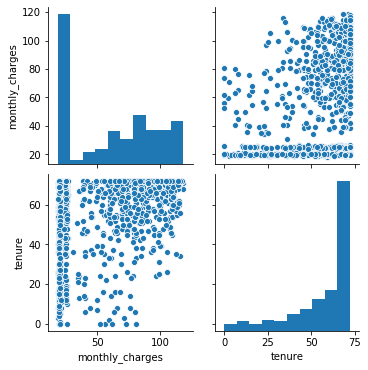

In [6]:
sns.pairplot(train)

In [7]:
def plot_variable_pairs():
    df = wrangle.get_data_from_sql()
    train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)
    fig = sns.regplot(x='tenure', y='monthly_charges', data=train)
    return fig


2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [9]:
df['tenure_years'] = (df.tenure / 12).round()
df.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,6.0
1,0014-BMAQU,84.65,63,5377.8,5.0
2,0016-QLJIS,90.45,65,5957.9,5.0
3,0017-DINOC,45.20,54,2460.55,4.0
4,0017-IUDMW,116.80,72,8456.75,6.0


In [10]:
def months_to_years():
    df = wrangle.get_data_from_sql()
    df['tenure_years'] = (df.tenure / 12).round(0)
    return df
    
### walkthru solution ###
#import math
#def months_to_years(df):
#    return df.assign(tenure_years-(df.tenure / 12).apply(math.floor))

3. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [11]:
df.head()
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

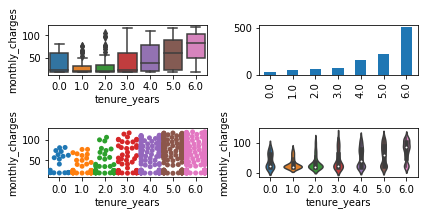

In [12]:
plt.subplot(321)
f1 = sns.boxplot(y='monthly_charges', x='tenure_years', data=train)
plt.subplot(322)
f2 = train.tenure_years.value_counts().sort_index().plot.bar()
plt.subplot(323)
f3 = sns.swarmplot(data=train, y='monthly_charges', x='tenure_years')
plt.subplot(324)
f4 = sns.violinplot(data=train, y='monthly_charges', x='tenure_years')

plt.tight_layout()
plt.show()

In [13]:
def plot_categorical_and_continuous_vars():
    df = wrangle.get_data_from_sql()
    df['tenure_years'] = (df.tenure / 12).round(0)
    train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)
    
    
    f1 = sns.boxplot(y='monthly_charges', x='tenure_years', data=train)
    plt.show() #plt.subplot(322)
    f2 = train.tenure_years.value_counts().sort_index().plot.bar()
    plt.show() #plt.subplot(323)
    f3 = sns.swarmplot(data=train, y='monthly_charges', x='tenure_years')
    plt.show() #plt.subplot(324)
    f4 = sns.violinplot(data=train, y='monthly_charges', x='tenure_years')

4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

In [14]:
#created

# 4. a - Rewrite your notebook code so that you are using the functions imported from this file. Restart kernal and begin here.

In [15]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import pandas as pd
import numpy as np
import wrangle
from env import host, user, password
import seaborn as sns
import matplotlib.pyplot as plt
import explore
import math

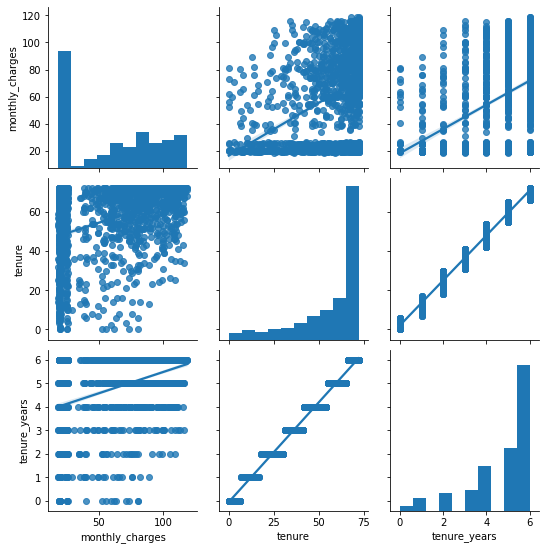

In [16]:
explore.plot_variable_pairs(df)

In [17]:
explore.months_to_years(df)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.8,5
2,0016-QLJIS,90.45,65,5957.9,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.4,5
1691,9972-EWRJS,19.25,67,1372.9,5
1692,9975-GPKZU,19.75,46,856.5,3
1693,9993-LHIEB,67.85,67,4627.65,5


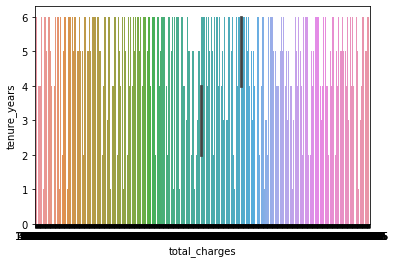

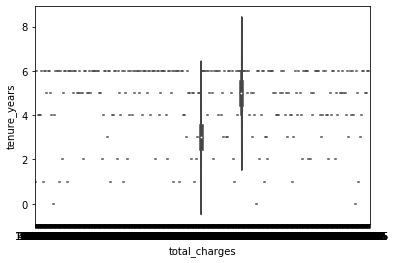

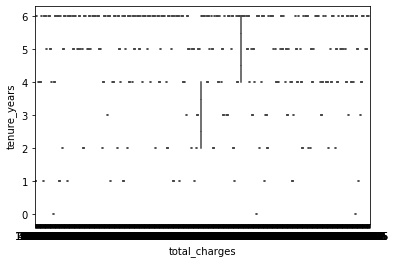

In [18]:

explore.plot_categorical_and_continuous_vars(train, 'total_charges', 'tenure_years')

6. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [19]:
from sklearn.model_selection import train_test_split

df = wrangle.get_mall_customer_data()

train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

train.shape, validate.shape, test.shape

((128, 5), (32, 5), (40, 5))

In [20]:
train.head()

,customer_id,gender,age,annual_income,spending_score
113,114,Male,19,64,46
55,56,Male,47,43,41
153,154,Female,38,78,76
100,101,Female,23,62,41
198,199,Male,32,137,18


In [21]:
# dropping customer id, not helpful
train.drop(columns='customer_id')

,gender,age,annual_income,spending_score
113,Male,19,64,46
55,Male,47,43,41
153,Female,38,78,76
100,Female,23,62,41
198,Male,32,137,18
...,...,...,...,...
175,Female,30,88,86
101,Female,49,62,48
148,Female,34,78,22
99,Male,20,61,49


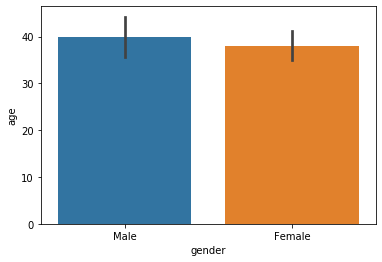

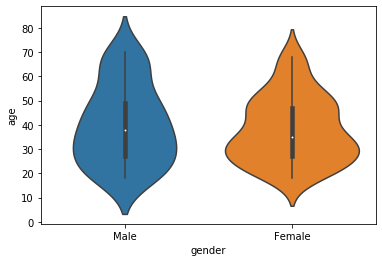

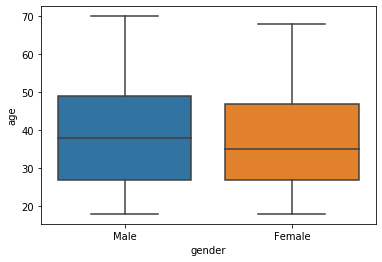

In [22]:
explore.plot_categorical_and_continuous_vars(train, 'gender', 'age')